Lab 5 - Python ML and Text Mining

Carson Do xbh4ya

12/05/2024

In [54]:
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


drive.mount('/content/drive', force_remount=True)
file_path = '/content/drive/My Drive/Colab Notebooks/spam.csv'

df = pd.read_csv(file_path)
print(df.head())

Mounted at /content/drive
     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [55]:
#25:
spamonly = df[df['v1'] == 'spam']

duplicates_count = spamonly.duplicated().sum()

print(duplicates_count)

94


In [56]:
#26
spamonly_unique = spamonly.drop_duplicates()
total_sms = spamonly_unique.shape[0]

print(total_sms)

653


In [57]:
#27
df_unique = df.drop_duplicates().copy()
df_unique.loc[:, 'message_length'] = df_unique['v2'].apply(len)
average_length = df_unique['message_length'].mean()

print(average_length)

78.97794544399304


In [58]:
#28
df_unique = df.drop_duplicates().copy()
df_unique.loc[:, 'sentence_count'] = df_unique['v2'].apply(
    lambda x: len([s for s in x.split('.') if s.strip()]) +
              len([s for s in x.split('?') if s.strip()]) +
              len([s for s in x.split('!') if s.strip()])
)
max_sentences = df_unique['sentence_count'].max()

print(max_sentences)

33


In [59]:
#29
df_unique = df.drop_duplicates().copy()
df_unique.loc[:, 'word_count'] = df_unique['v2'].apply(lambda x: len(x.split()))
min_words = df_unique['word_count'].min()

print(min_words)

1


In [60]:
#30
df_unique = df.drop_duplicates().copy()
df_unique.loc[:, 'capital_count'] = df_unique['v2'].apply(lambda x: sum(1 for char in x if char.isupper()))
first_five_sms = df_unique.head(5)
max_capital_letters = first_five_sms['capital_count'].max()

print(max_capital_letters)

10


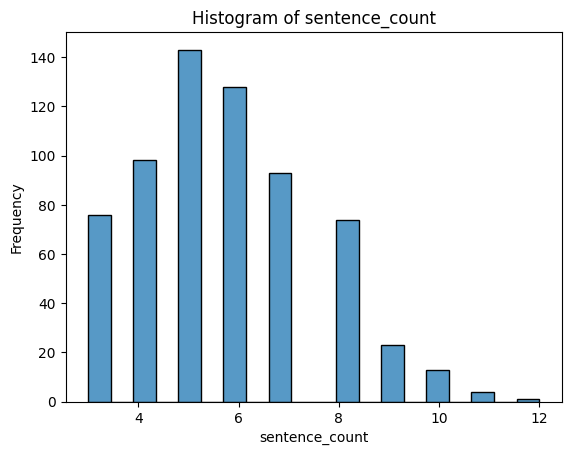

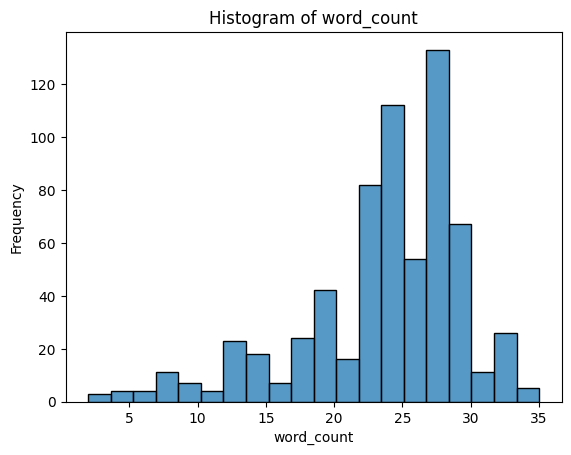

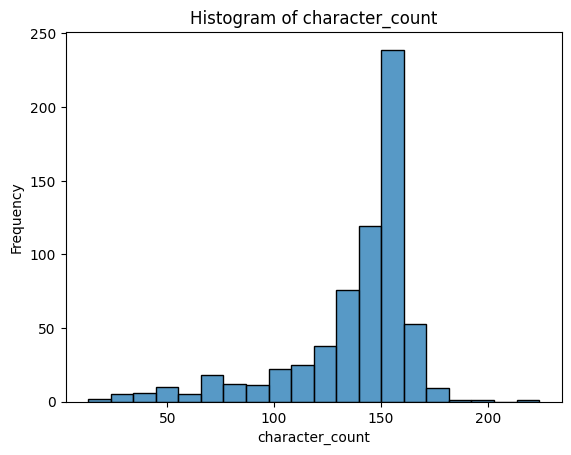

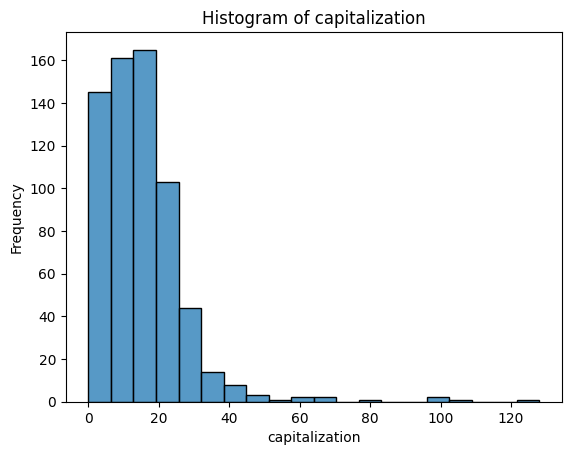

In [61]:
#31
df_unique = df.drop_duplicates()
spamonly = df_unique[df_unique['v1'] == 'spam'].copy()
spamonly['sentence_count'] = spamonly['v2'].apply(
    lambda x: len([s for s in x.split('.') if s.strip()]) +
              len([s for s in x.split('?') if s.strip()]) +
              len([s for s in x.split('!') if s.strip()])
)
spamonly['word_count'] = spamonly['v2'].apply(lambda x: len(x.split()))
spamonly['character_count'] = spamonly['v2'].apply(len)
spamonly['capitalization'] = spamonly['v2'].apply(lambda x: sum(1 for char in x if char.isupper()))

features = ['sentence_count', 'word_count', 'character_count', 'capitalization']
for feature in features:
    plt.figure()
    sns.histplot(spamonly[feature], kde=False, bins=20)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

In [62]:
#32
df_unique = df.drop_duplicates().copy()
df_unique['target_encoded'] = le.fit_transform(df_unique['v1'])

df_unique['numeric_count'] = df_unique['v2'].apply(lambda x: sum(c.isdigit() for c in x))
df_unique['capitalization'] = df_unique['v2'].apply(lambda x: sum(1 for c in x if c.isupper()))
df_unique['words_count'] = df_unique['v2'].apply(lambda x: len(x.split()))
df_unique['sentences_count'] = df_unique['v2'].apply(
    lambda x: len([s for s in x.split('.') if s.strip()]) +
              len([s for s in x.split('?') if s.strip()]) +
              len([s for s in x.split('!') if s.strip()])
)

correlations = df_unique[['numeric_count', 'capitalization', 'words_count', 'sentences_count', 'target_encoded']].corr()
correlations_with_target = correlations['target_encoded'].drop('target_encoded')

highest_correlation = correlations_with_target.idxmax()
print(highest_correlation)

numeric_count
